# Comparing Distance Based Classifiers

## Submitted By Harsh Srivastava
## 117CS0755

### importing libraries

In [1]:
import numpy as np
import pandas as pd
%pylab inline
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

Populating the interactive namespace from numpy and matplotlib


### function to calculate euclidean distance between two vectors

In [2]:
def euclidean(a, b) :
    dist = a - b
    sq_dist = np.dot(np.transpose(dist), dist)
    sq_dist = np.sqrt(sq_dist)
    return sq_dist

### function to calculate city block distance between two vectors

In [3]:
def city_block(a, b) :
    dist = np.abs(a - b)
    return np.sum(dist)

### function to calculate chess board distance between two vectors

In [4]:
def chess_board(a, b) :
    dist = np.abs(a - b)
    return max(dist)

### function to calculate cosine distance between two vectors

In [5]:
def cos_dist(a, b) :
    dot_product = np.dot(a, b.T)
    norm_a = np.linalg.norm(a) 
    norm_b = np.linalg.norm(b) 
    return 1 - (dot_product / (norm_a * norm_b))

### function to calculate bray curtis distance between two vectors

In [6]:
def bray_curtis(a, b) :
    d1 = np.sum(np.abs(a - b))
    d2 = np.sum(np.abs(a + b))
    return d1 / d2

### function to calculate canberra distance between two vectors

In [7]:
def canberra(a, b) :
    dist = np.abs(a - b) / (np.abs(a) + np.abs(b))
    return np.sum(dist)

### function to calculate mahalonobis distance between two vectors

In [8]:
def mahalonobis(a, b, input_space) :
    cov = np.cov(input_space.T)
    cov_inv = np.linalg.inv(cov)
    diff = a - b
    dist = np.dot(np.dot(diff.T, cov_inv), diff)
    return dist

### function to calculate correlation distance between two vectors

In [9]:
def correlation(a, b) :
    dev_a = a - np.mean(a)
    dev_b = b - np.mean(b)
    norm_a = np.linalg.norm(dev_a) 
    norm_b = np.linalg.norm(dev_b) 
    dist = 1 - (np.dot(dev_a, dev_b.T) / (norm_a * norm_b))
    return dist

### function to calculate minkowski distance between two vectors

In [10]:
def minkowski(a, b, p) :
    diff = np.abs(a - b)
    dist = pow(np.sum(pow(diff, p)), (1 / p))
    return dist

### fucntion to select a distance type

In [11]:
def distance(a, b, input_space, dist_type = 0) :
    
    if dist_type == 0 :
        return euclidean(a, b)
    
    elif dist_type == 1 :
        return city_block(a, b)
    
    elif dist_type == 2 :
        return chess_board(a, b)
    
    elif dist_type == 3 :
        return cos_dist(a, b)
    
    elif dist_type == 4 :
        return bray_curtis(a, b)
    
    elif dist_type == 5:
        return canberra(a, b)
    
    elif dist_type == 6:
        return mahalonobis(a, b, input_space)
    
    elif dist_type == 7:
        return correlation(a, b)
    
    elif dist_type == 8:
        return minkowski(a, b, np.random.randint(1, 10))

### distance types dictionary

In [12]:
dist_dict = {0: 'Euclidean',
                1: 'City Block',
                2: 'Chess Board',
                3: 'Cosine',
                4: 'Bray Curtis',
                5: 'Canberra',
                6: 'Mahalonobis',
                7: 'Correlation',
                8: 'Minkowski'}

dist_nums = len(dist_dict)

### splitting dataset into 3 classes

In [13]:
dataset = pd.read_csv('IRIS.csv')

dataset_class1 = dataset.loc[0:49, :]
dataset_class2 = dataset.loc[50:99, :]
dataset_class3 = dataset.loc[100:149, :]

### Iris-setosa

In [14]:
dataset_class1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


### Iris-versicolor

In [15]:
dataset_class2

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,Iris-versicolor
51,6.4,3.2,4.5,1.5,Iris-versicolor
52,6.9,3.1,4.9,1.5,Iris-versicolor
53,5.5,2.3,4.0,1.3,Iris-versicolor
54,6.5,2.8,4.6,1.5,Iris-versicolor
55,5.7,2.8,4.5,1.3,Iris-versicolor
56,6.3,3.3,4.7,1.6,Iris-versicolor
57,4.9,2.4,3.3,1.0,Iris-versicolor
58,6.6,2.9,4.6,1.3,Iris-versicolor
59,5.2,2.7,3.9,1.4,Iris-versicolor


### Iris-virginica

In [16]:
dataset_class3

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,Iris-virginica
101,5.8,2.7,5.1,1.9,Iris-virginica
102,7.1,3.0,5.9,2.1,Iris-virginica
103,6.3,2.9,5.6,1.8,Iris-virginica
104,6.5,3.0,5.8,2.2,Iris-virginica
105,7.6,3.0,6.6,2.1,Iris-virginica
106,4.9,2.5,4.5,1.7,Iris-virginica
107,7.3,2.9,6.3,1.8,Iris-virginica
108,6.7,2.5,5.8,1.8,Iris-virginica
109,7.2,3.6,6.1,2.5,Iris-virginica


### creating a dictionary to map class name with our defined labels
### 'Iris-setosa' --> 0
### 'Iris-versicolor' --> 1
### 'Iris-virginica' --> 2

In [17]:
iris_dict = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}
iris_dict

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

### splitting features and classes

In [18]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

X1 = dataset_class1[features]
X2 = dataset_class2[features]
X3 = dataset_class3[features]

X1 = normalize(X1, 'l2')
X2 = normalize(X2, 'l2')
X3 = normalize(X3, 'l2')

### splitting dataset into training and test

In [19]:
from sklearn.model_selection import train_test_split

x_train1_pd, x_test1_pd = train_test_split(X1, test_size=.4)
x_train2_pd, x_test2_pd = train_test_split(X2, test_size=.4)
x_train3_pd, x_test3_pd = train_test_split(X3, test_size=.4)

num_test = 20
num_train = 50 - num_test
total_num_test = 60
total_num_train = 150 - total_num_test

x_train1_pd

array([[0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.81609427, 0.5336001 , 0.21971769, 0.03138824],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.86093857, 0.44003527, 0.24871559, 0.0573959 ],
       [0.80597792, 0.52151512, 0.26865931, 0.07901744],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.776114  , 0.54974742, 0.30721179, 0.03233808],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.80212413, 0.54690282, 0.23699122, 0.03646019],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.79837025, 0.55735281, 0.22595384, 0.03012718],
       [0.78889479, 0.55222635, 0.25244633, 0.09466737],
       [0.82225028, 0.51771314, 0.22840286, 0.06090743],
       [0.77867447, 0.59462414, 0.19820805, 0.02831544],
       [0.79524064, 0.54144043, 0.27072022, 0.03384003],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.76693897, 0.57144472,

### converting training and test datasets to numpy arrays for easy calculations

In [20]:
x_train = []
x_test = []

x_train.append(x_train1_pd)#.to_numpy())
x_train.append(x_train2_pd)#.to_numpy())
x_train.append(x_train3_pd)#.to_numpy())

x_test.append(x_test1_pd)#.to_numpy())
x_test.append(x_test2_pd)#.to_numpy())
x_test.append(x_test3_pd)#.to_numpy())

print(x_train[0])
print(x_test[0])

print(x_train[0].shape)
print(x_test[0].shape)

[[0.82307218 0.51442011 0.24006272 0.01714734]
 [0.81609427 0.5336001  0.21971769 0.03138824]
 [0.78010936 0.57660257 0.23742459 0.0508767 ]
 [0.86093857 0.44003527 0.24871559 0.0573959 ]
 [0.80597792 0.52151512 0.26865931 0.07901744]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.81120865 0.55945424 0.16783627 0.02797271]
 [0.776114   0.54974742 0.30721179 0.03233808]
 [0.80373519 0.55070744 0.22325977 0.02976797]
 [0.80212413 0.54690282 0.23699122 0.03646019]
 [0.786991   0.55745196 0.26233033 0.03279129]
 [0.79837025 0.55735281 0.22595384 0.03012718]
 [0.78889479 0.55222635 0.25244633 0.09466737]
 [0.82225028 0.51771314 0.22840286 0.06090743]
 [0.77867447 0.59462414 0.19820805 0.02831544]
 [0.79524064 0.54144043 0.27072022 0.03384003]
 [0.80642366 0.5315065  0.25658935 0.03665562]
 [0.76693897 0.57144472 0.28572236 0.06015208]
 [0.77381111 0.59732787 0.2036345  0.05430253]
 [0.81803119 0.51752994 0.25041771 0.01669451]
 [0.79778206 0.5424918  0.25529026 0.06382256]
 [0.81228363 

### calculating mean of features of classes in training dataset

In [21]:
mean = []

mean.append(np.mean(x_train[0], axis = 0))
mean.append(np.mean(x_train[1], axis = 0))
mean.append(np.mean(x_train[2], axis = 0))

print(mean[0])
print(mean[1])
print(mean[2])

[0.80184486 0.54520738 0.23574351 0.04115118]
[0.74726389 0.34832392 0.53835635 0.16803758]
[0.70542075 0.31784356 0.59273109 0.21819911]


### predicting classes for iris-setosa test data using euclidean distance

In [22]:
def prediction_distance_types(dist_type = 0) :

    correct_count = 0 # variable to count number of training examples correctly classified
    pred = []
    error = []

    for i in range(3) :
        train = x_train[i] # for covariance matrix
        test = x_test[i]

        for j in range(num_test) :
            min_dist = distance(test[j], mean[0], train, dist_type)
            min_idx = 0

            for k in range(len(mean)) :
                dist = distance(test[j], mean[k], train, dist_type)
                if dist < min_dist :
                    min_dist = dist
                    min_idx = k

            pred.append(iris_dict[min_idx])
            error.append(min_dist)

            if min_idx == i :
                correct_count += 1
                

    MER = 1.0 - (correct_count / total_num_test)
    
    return MER, correct_count, pred, error

### predicting using different distance methods

In [23]:
MER_vals = []
correct_count_vals = []
error_vals = []

for i in range(dist_nums) :
    MER, correct_count, pred, error = prediction_distance_types(i)
    print("MER for {} distance = {}".format(dist_dict[i], MER))
    print("Number of Correct classifications out of {} = {}\n".format(total_num_test, correct_count))
    MER_vals.append(MER)
    correct_count_vals.append(correct_count)
    error_vals.append(error)

MER for Euclidean distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for City Block distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for Chess Board distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for Cosine distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for Bray Curtis distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for Canberra distance = 0.06666666666666665
Number of Correct classifications out of 60 = 56

MER for Mahalonobis distance = 0.033333333333333326
Number of Correct classifications out of 60 = 58

MER for Correlation distance = 0.050000000000000044
Number of Correct classifications out of 60 = 57

MER for Minkowski distance = 0.08333333333333337
Number of Correct classifications out of 60 = 55



### Plotting MER vs distance type classifier

Plotting MER vs Classifier Type


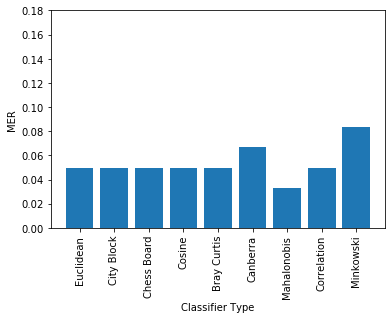

In [24]:
print("Plotting MER vs Classifier Type")    
plt.bar(list(dist_dict.values()), MER_vals)
plt.xlabel('Classifier Type')
plt.ylabel('MER')

plt.xticks(rotation=90)
plt.yticks(np.arange(0, 0.2, 0.02))
plt.show()

### Mean Error and plot

Plotting Mean Error vs Classifier Type


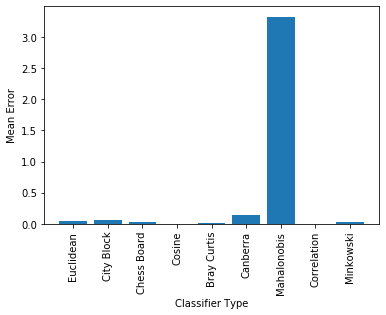

In [25]:
error_vals = np.array(error_vals)
mean_error = np.mean(error_vals, axis = 1)

print("Plotting Mean Error vs Classifier Type")    
plt.bar(list(dist_dict.values()), mean_error)
plt.xlabel('Classifier Type')
plt.ylabel('Mean Error')

plt.xticks(rotation=90)
plt.show()

### Mean Squared Error and plot

Plotting Mean Squared Error vs Classifier Type


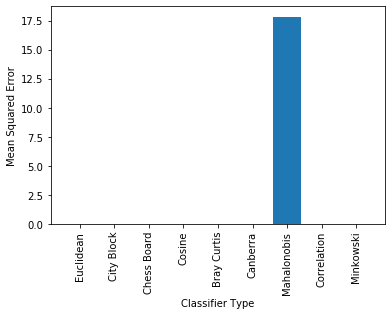

In [26]:
mean_squared_error = np.mean(np.square(error_vals), axis = 1)

print("Plotting Mean Squared Error vs Classifier Type")    
plt.bar(list(dist_dict.values()), mean_squared_error)
plt.xlabel('Classifier Type')
plt.ylabel('Mean Squared Error')

plt.xticks(rotation=90)
plt.show()

### Mean absolute Error and plot

Plotting Mean Absolute Error vs Classifier Type


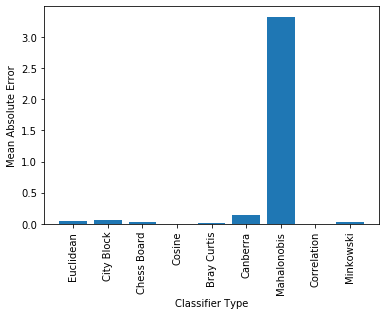

In [27]:
mean_absolute_error = np.mean(np.abs(error_vals), axis = 1)

print("Plotting Mean Absolute Error vs Classifier Type")    
plt.bar(list(dist_dict.values()), mean_absolute_error)
plt.xlabel('Classifier Type')
plt.ylabel('Mean Absolute Error')

plt.xticks(rotation=90)
plt.show()